In [19]:
import pandas as pd
import matplotlib.pyplot as plt
# 기본 csv 파일 불러오기
#file_path = "C:/Bigdata/work/Project01/faang_stocks_pandemic_data.csv" # 실습실
file_path = "C:/Users/Jiuk Choi/Documents/python/faang_stocks_pandemic_data.csv" # 집
ff = pd.read_csv(file_path, names = ['Date', 'Close'])


In [24]:
ff['Date'] = pd.to_datetime(ff['Date'])
# Date 열의 날짜 데이터를 pandas datetime(시계열 피처 단위)로 변경



ParserError: Unknown string format: Adj Close

In [25]:
ff.index = ff['Date']
ff.set_index('Date', inplace=True)

ff.describe()

,Close
count,2841
unique,6
top,Facebook
freq,568


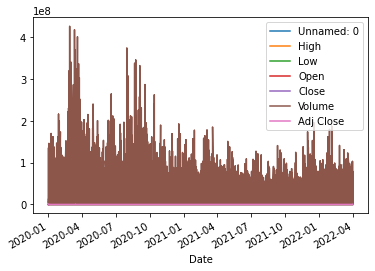

In [9]:
ff.plot()
plt.show()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
# 기본 csv 파일 불러오기
#file_path = "C:/Bigdata/work/Project01/faang_stocks_pandemic_data.csv" # 실습실
file_path = "C:/Users/Jiuk Choi/Documents/python/faang_stocks_pandemic_data.csv" # 집
ff = pd.read_csv(file_path,parse_dates=['Date'], index_col='Date')

<AxesSubplot:xlabel='Date'>

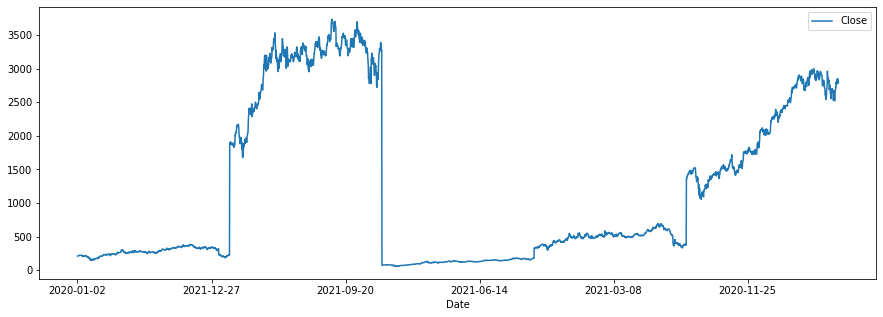

In [37]:
fff.plot(x='Date', y='Close',figsize = (15,5))


In [38]:
fff

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999,Facebook
1,684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998,Facebook
2,685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006,Facebook
3,686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998,Facebook
4,687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001,Facebook
...,...,...,...,...,...,...,...,...,...
2835,1246,2022-03-28,2840.050049,2796.229980,2818.010010,2829.110107,1752500.0,2829.110107,Google
2836,1247,2022-03-29,2875.870117,2840.770020,2852.949951,2850.110107,1715900.0,2850.110107,Google
2837,1248,2022-03-30,2854.409912,2832.000000,2849.199951,2838.770020,994200.0,2838.770020,Google
2838,1249,2022-03-31,2842.159912,2780.489990,2841.060059,2781.350098,1876200.0,2781.350098,Google


In [34]:
def plot_fff(fff, x, y, title="", xlabel='Date', ylabel='Close', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

    plot_fff(fff, x=fff.Date, y=fff.Close, title='Faang')

In [35]:
plot_fff

<function __main__.plot_fff(fff, x, y, title='', xlabel='Date', ylabel='Close', dpi=100)>

In [122]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pandas_datareader import data  
from datetime import datetime
import pandas as pd
import cufflinks
import plotly.offline as plyo

# 기본 csv 파일 불러오기
#file_path = "C:/Bigdata/work/Project01/faang_stocks_pandemic_data.csv" # 실습실
file_path = "C:/Users/Jiuk Choi/Documents/python/faang_stocks_pandemic_data.csv" # 집
ff = pd.read_csv(file_path,parse_dates=['Date'], index_col='Date')



In [123]:
ff = ff.reset_index()

ff['Date'] = ff['Date'].apply(lambda x : datetime.strftime(x, '%Y-%m-%d')) # Datetime to str


stock_name = 'Facebook'
fig = go.Figure(data=[go.Candlestick(x=ff['Date'],
                                    open=ff['Open'],
                                    high=ff['High'],
                                    low=ff['Low'],
                                    close=ff['Close'])])

fig.layout = dict(title=stock_name, 
                       xaxis = dict(type="category", 
                                    categoryorder='category ascending'))
fig.update_xaxes(nticks=5)

In [124]:

plyo.iplot(ff.iplot(asFigure=True))


In [125]:
fff = pd.read_csv("C:/Users/Jiuk Choi/Documents/python/faang_stocks_pandemic_data.csv", index_col='Name')

name_ff = fff.loc['Facebook']


name_ff

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close
Name,,,,,,,,
Facebook,683,2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100.0,209.779999
Facebook,684,2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400.0,208.669998
Facebook,685,2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900.0,212.600006
Facebook,686,2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400.0,213.059998
Facebook,687,2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000.0,215.220001
...,...,...,...,...,...,...,...,...
Facebook,1246,2022-03-28,224.039993,219.539993,222.130005,223.589996,26224100.0,223.589996
Facebook,1247,2022-03-29,230.889999,225.289993,226.070007,229.860001,31417900.0,229.860001
Facebook,1248,2022-03-30,231.149994,226.710007,228.910004,227.850006,25588000.0,227.850006


In [126]:
plyo.iplot(name_ff.iplot(asFigure=True))

In [128]:
name_ff = name_ff.reset_index()

stock_name = 'Facebook'

fig = go.Figure(data=[go.Candlestick(x=name_ff['Date'],
                                    open=name_ff['Open'],
                                    high=name_ff['High'],
                                    low=name_ff['Low'],
                                    close=name_ff['Close'])])


fig.layout = dict(title=stock_name, 
                       xaxis = dict(type="category", 
                                    categoryorder='category ascending'))
fig.update_xaxes(nticks=5)
